# STROKE PREDICTION ANALYSIS
### Author: EZRA BETT


In [57]:
#importing libraries
import kagglehub
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil
import warnings
warnings.filterwarnings("ignore")

In [58]:

#Downloading data to kagglehub cache
original_path = kagglehub.dataset_download("mahatiratusher/stroke-risk-prediction-dataset")

# Defining path
custom_path = os.path.expanduser("~/Desktop/ML_assignment/mahatiratusher/stroke-risk-prediction-dataset")

## EXPLOTRATORY DATA ANALYSIS

In [59]:

#reading the dataset
csv_file = os.path.join(custom_path, "stroke_risk_dataset.csv")
stroke_data = pd.read_csv(csv_file)
#display the first 5 rows
stroke_data.head()


,Chest Pain,Shortness of Breath,Irregular Heartbeat,Fatigue & Weakness,Dizziness,Swelling (Edema),Pain in Neck/Jaw/Shoulder/Back,Excessive Sweating,Persistent Cough,Nausea/Vomiting,High Blood Pressure,Chest Discomfort (Activity),Cold Hands/Feet,Snoring/Sleep Apnea,Anxiety/Feeling of Doom,Age,Stroke Risk (%),At Risk (Binary)
0,0,1,1,1,0,0,0,1,1,1,0,1,1,0,0,54,58.0,1
1,0,0,1,0,0,1,0,0,0,0,1,0,1,1,0,49,40.5,0
2,1,0,0,1,1,1,0,0,1,0,0,0,0,1,0,62,52.0,1
3,1,0,1,1,0,1,1,1,1,1,1,0,0,0,0,48,60.0,1
4,0,0,1,0,0,1,0,1,0,1,1,0,0,1,1,61,56.5,1


#### Dataframe structure/information

In [60]:
#info of the dataset
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Chest Pain                      70000 non-null  int64  
 1   Shortness of Breath             70000 non-null  int64  
 2   Irregular Heartbeat             70000 non-null  int64  
 3   Fatigue & Weakness              70000 non-null  int64  
 4   Dizziness                       70000 non-null  int64  
 5   Swelling (Edema)                70000 non-null  int64  
 6   Pain in Neck/Jaw/Shoulder/Back  70000 non-null  int64  
 7   Excessive Sweating              70000 non-null  int64  
 8   Persistent Cough                70000 non-null  int64  
 9   Nausea/Vomiting                 70000 non-null  int64  
 10  High Blood Pressure             70000 non-null  int64  
 11  Chest Discomfort (Activity)     70000 non-null  int64  
 12  Cold Hands/Feet                 

My dataset consist of `16` featurs, `2` target variables and `70000` rows of data points. The predominant data type is `int64` except for one of the target variables which is in `float64`. All columns are complete and there isn't any missing value which is good.
#### Summary statistics
Numerical values known as summary statistics are used to characterize and condense a dataset's characteristics, including its distribution form, dispersion, and central tendency. The mean, median, standard deviation, lowest, and maximum values are typical examples.

In [61]:
#summary statistics
stroke_data.describe()

,Chest Pain,Shortness of Breath,Irregular Heartbeat,Fatigue & Weakness,Dizziness,Swelling (Edema),Pain in Neck/Jaw/Shoulder/Back,Excessive Sweating,Persistent Cough,Nausea/Vomiting,High Blood Pressure,Chest Discomfort (Activity),Cold Hands/Feet,Snoring/Sleep Apnea,Anxiety/Feeling of Doom,Age,Stroke Risk (%),At Risk (Binary)
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,0.501871,0.496471,0.498886,0.500100,0.503043,0.500557,0.499186,0.503671,0.500800,0.501943,0.500643,0.499557,0.498871,0.500686,0.499871,54.056429,55.558771,0.649200
std,0.500000,0.499991,0.500002,0.500004,0.499994,0.500003,0.500003,0.499990,0.500003,0.500000,0.500003,0.500003,0.500002,0.500003,0.500004,21.071567,14.300898,0.477224
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,5.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000,45.500000,0.000000
50%,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000,55.500000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,66.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,90.000000,100.000000,1.000000


The summary statistics show that most features in the stroke dataset are binary, with values ranging between 0 and 1, and a nearly even distribution around the mean (approximately 0.5), indicating no strong class imbalance for most symptoms. The Age variable ranges from 18 to 90 years with a mean of about 54, while the Stroke Risk (%) has an average of 55.6% and varies widely (std ≈ 14.3), suggesting diverse stroke risk levels across the sample.
#### Outliers
Data points that diverge substantially from the rest of the data are known as outliers.  They may be from data entry errors, measurement variability, or real but uncommon events. They might be either very high or low values that significantly differ from previous observations.  Outliers can distort statistical analyses and impact model performance, therefore it's critical to recognize and manage them.
I will use boxplots to identify any outliers in the dataset.

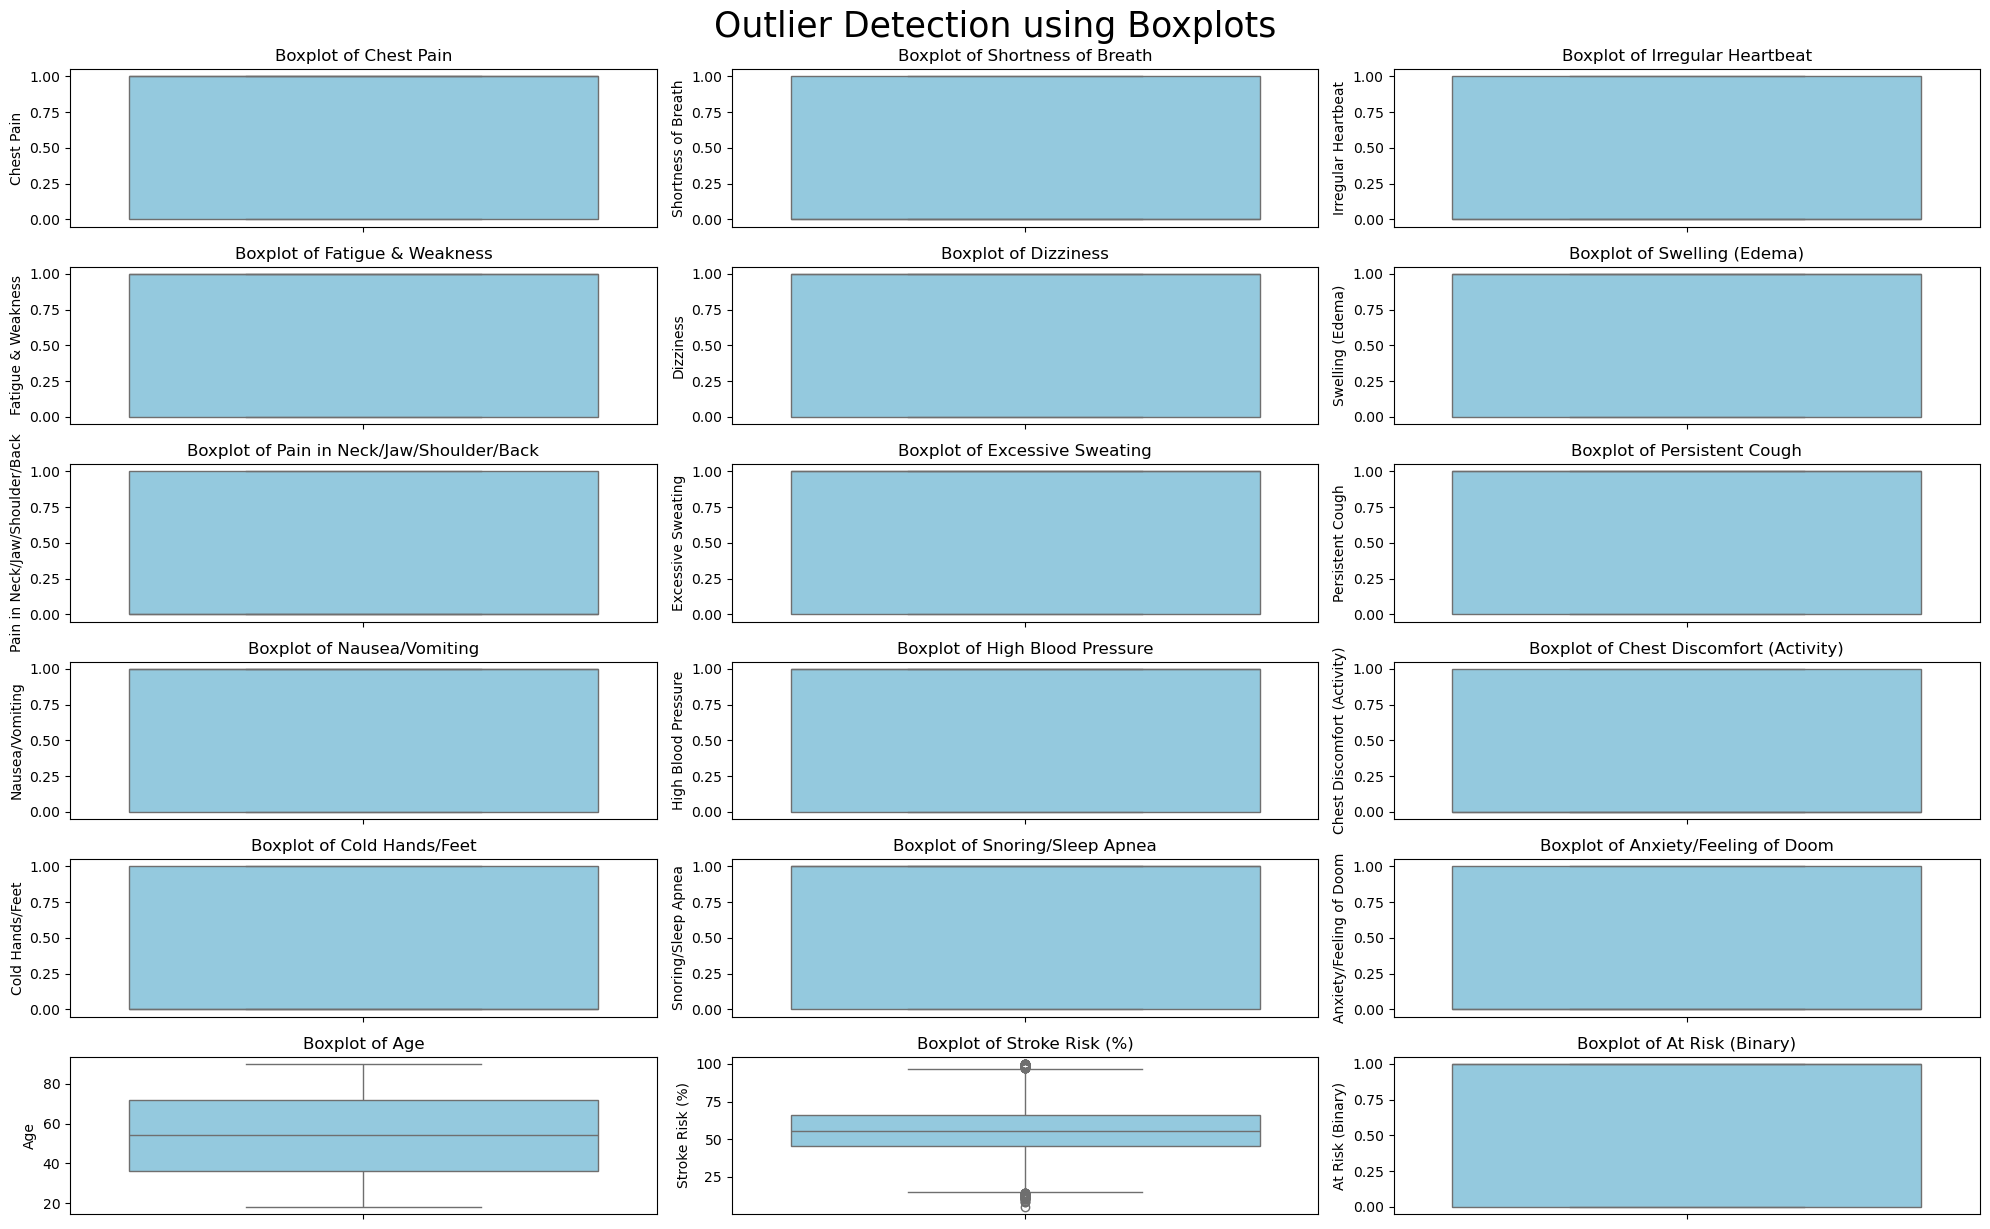

In [62]:
# Filter numerical columns
numerical_cols = stroke_data.select_dtypes(include=['number']).columns

# Set figure size
plt.figure(figsize=(20, 12))

# Create subplots
for i, col in enumerate(numerical_cols, 1):
    plt.subplot((len(numerical_cols) + 2) // 3, 3, i)
    sns.boxplot(y=stroke_data[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.suptitle("Outlier Detection using Boxplots", fontsize=25, y=1.02)
plt.show()


Looking at the output of the above visual, it is evident that we don't have outliers in our features. The data is well-distributed and there are no extreme values that could be considered as outliers. This is not the case though for one of our target variables, `Stroke risk %`, there seem to be some outliers. This can be caused by patients having a high risk or low risk of getting stroke due to their age and health conditions. I will investigate this further on the next steps of my exploratory analysis.
#### Duplicates
It is always nice to check for duplicates as they can lead to biased analysis, inaccurate model training, and inflated statistics by over-representing certain observations. Removing duplicates ensures the integrity and reliability of the dataset.

In [63]:
#Checking for duplicates
stroke_data.duplicated().sum()

1021

I have a total of `1021` duplicates in my data. I will investigate them more before deciding to keep or drop them.

In [64]:
# Check how many duplicates exist
duplicate_rows = stroke_data[stroke_data.duplicated()]
print("Number of duplicates:", duplicate_rows.shape[0])
duplicate_rows.head(15)


Number of duplicates: 1021


,Chest Pain,Shortness of Breath,Irregular Heartbeat,Fatigue & Weakness,Dizziness,Swelling (Edema),Pain in Neck/Jaw/Shoulder/Back,Excessive Sweating,Persistent Cough,Nausea/Vomiting,High Blood Pressure,Chest Discomfort (Activity),Cold Hands/Feet,Snoring/Sleep Apnea,Anxiety/Feeling of Doom,Age,Stroke Risk (%),At Risk (Binary)
1519,0,1,1,1,1,1,1,0,0,1,1,0,0,1,0,77,74.5,1
1594,1,1,0,0,0,0,1,1,0,1,1,0,0,1,1,41,51.5,1
3483,0,0,1,0,1,1,0,0,1,1,0,1,1,0,1,59,60.5,1
3655,0,0,0,1,1,0,0,0,0,1,1,1,1,1,1,56,59.0,1
3912,0,1,1,0,0,0,1,0,0,1,1,0,1,1,0,66,59.0,1
4641,1,1,1,1,0,1,1,0,0,0,0,0,0,1,1,28,45.0,0
7134,1,1,0,1,0,0,1,0,0,1,1,0,0,0,1,38,45.0,0
7304,1,1,1,0,1,0,0,1,0,1,0,1,1,1,0,37,54.5,1
7350,0,1,0,0,1,0,0,0,1,1,1,0,1,0,1,29,40.5,0
7645,1,0,0,0,0,1,1,0,0,0,1,0,1,0,1,57,49.5,0


These rows are not exact duplicates, as not all values are completely identical. Some entries may appear similar but differ slightly in features such as age, stroke risk percentage, or binary symptom indicators. As a result, they might represent different individuals with similar medical profiles rather than duplicate records. In this case I will keep the "duplicate" records as they are not totally identical.

After checking for null values, duplicates, outliers and the summary statistics in my data and ensuring all these issues have been addressed, I will head straight to the next step which is univariate, bivariate and multivariate analysis.
#### Univariate data analysis
Univariate data analysis involves examining each variable in a dataset individually to understand its distribution and characteristics.The goal is to identify patterns, detect anomalies, and gain insights into how each variable behaves on its own.

In [74]:
columns = stroke_data.columns
columns

Index(['Chest Pain', 'Shortness of Breath', 'Irregular Heartbeat',
       'Fatigue & Weakness', 'Dizziness', 'Swelling (Edema)',
       'Pain in Neck/Jaw/Shoulder/Back', 'Excessive Sweating',
       'Persistent Cough', 'Nausea/Vomiting', 'High Blood Pressure',
       'Chest Discomfort (Activity)', 'Cold Hands/Feet', 'Snoring/Sleep Apnea',
       'Anxiety/Feeling of Doom', 'Age', 'Stroke Risk (%)',
       'At Risk (Binary)'],
      dtype='object')

In [66]:
#function to plot histograms in one figure
def plot_histograms(data, columns, n_rows, n_cols):
    plt.figure(figsize=(20, 20))
    for i, col in enumerate(columns, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.histplot(data[col], kde=True, color='skyblue')
        plt.title(f'Histogram of {col}')
        plt.tight_layout()
    plt.suptitle("Histograms of Numerical Features", fontsize=25, y=1.02)
    plt.show()

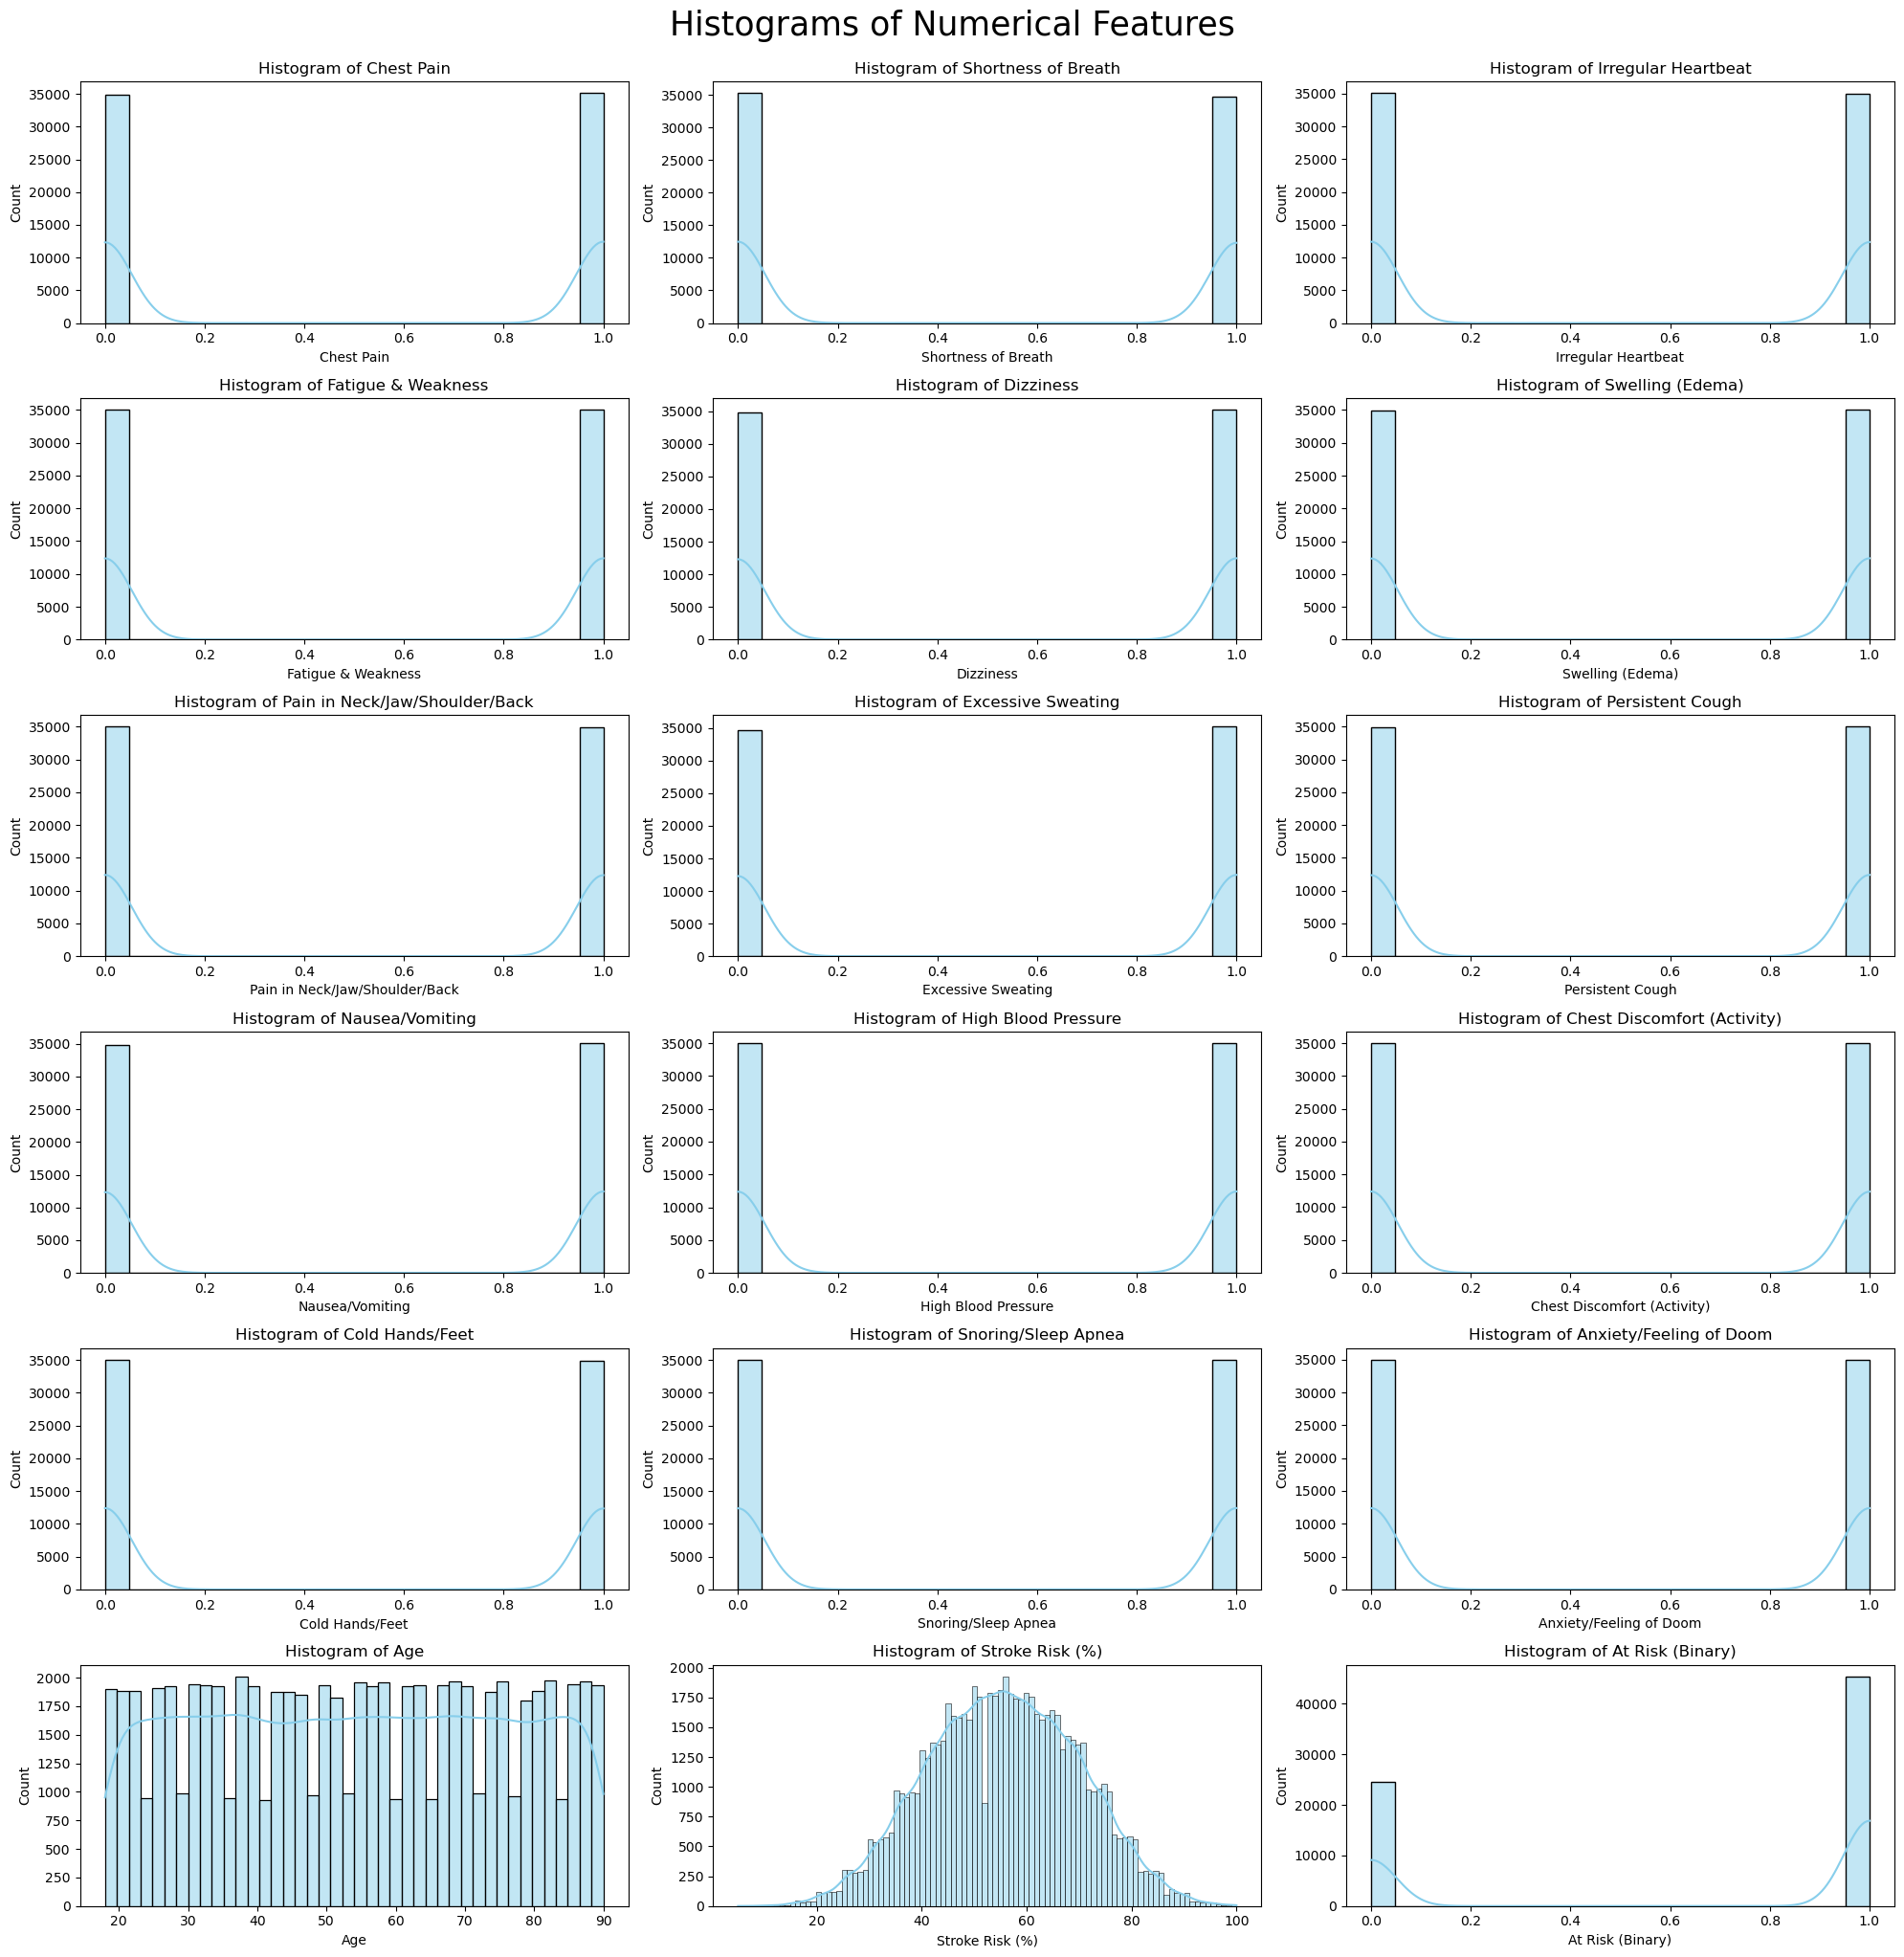

In [67]:
plot_histograms(stroke_data, columns, 6, 3)

The distribution plots of the stroke prediction dataset show that most symptom-related features are binary, with values concentrated at 0 and 1, indicating the presence or absence of specific conditions. These features appear relatively balanced, which is beneficial for training classification models. The age variable is uniformly distributed across the range of 18 to 90, ensuring diverse representation. Stroke risk (%) follows an approximately gaussian distribution centered around 55%, suggesting most individuals fall into a moderate-risk category. However, the "At Risk (Binary)" variable is heavily skewed toward 1, indicating class imbalance that could affect model performance and may require resampling or class-weight adjustments during modeling.

Remember the outliers in the `Stroke Risk (%)` column, looking at the distribution, it seems to go upto 100%. This doesn't make sense to my problem since if the prediction is 100% that means the person already suffered from stroke or is dead. My aim goal is to predict the risk of stroke for a person, not the certainty of stroke. I will plot the distribution of `Stroke Risk (%)` before and after removing the outliers and look at the difference.

In [ ]:
#IQR to remove outliers
'Stroke Risk (%)'
Q1 = stroke_data['Stroke Risk (%)'].quantile(0.25)
Q3 = stroke_data['Stroke Risk (%)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
#new df with outliers removed
without_outliers = stroke_data[(stroke_data['Stroke Risk (%)'] >= lower_bound) & (stroke_data['Stroke Risk (%)'] <= upper_bound)]


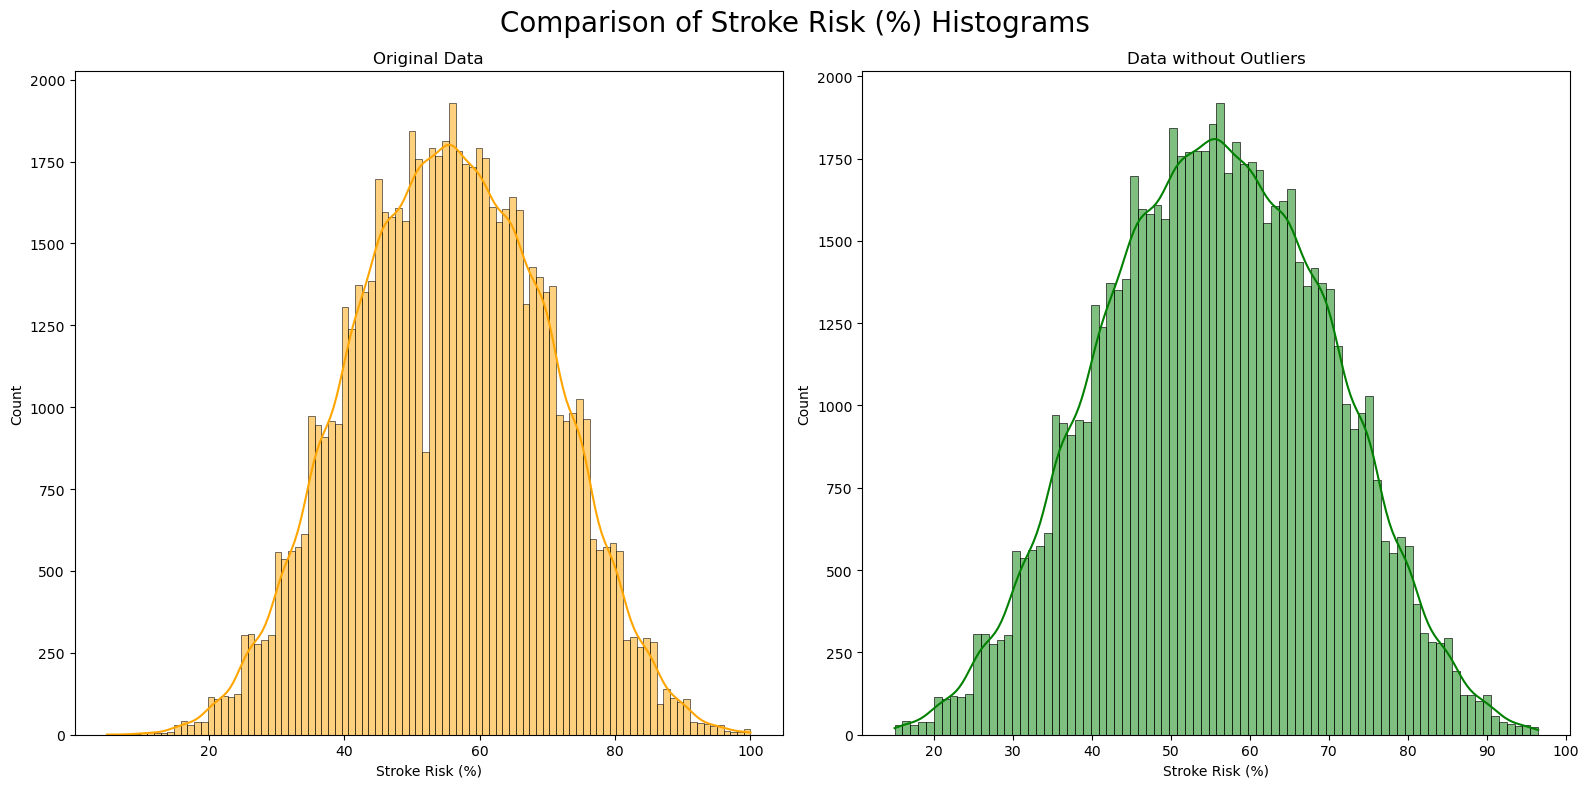

In [ ]:
#plottimg histograms for original and outlier-removed data
def plot_side_by_side_histograms(data1, data2, column, title1, title2):
    plt.figure(figsize=(16, 8))
    
    # Plot histogram for the first dataset
    plt.subplot(1, 2, 1)
    sns.histplot(data1[column], kde=True, color='orange')
    plt.title(title1)
    
    # Plot histogram for the second dataset
    plt.subplot(1, 2, 2)
    sns.histplot(data2[column], kde=True, color='green')
    plt.title(title2)
    
    plt.suptitle(f'Comparison of {column} Histograms', fontsize=20)
    plt.tight_layout()
    plt.show()
    
plot_side_by_side_histograms(stroke_data, without_outliers, 'Stroke Risk (%)', 'Original Data', 'Data without Outliers')

After removing the outliers, the data spreads up to almost 95%. This meets my research and I will drop the outliers at this point. Looking at plots, the one without outliers has a well defined bell shape and has a smooth curve than the one with outliers.
#### Bivariate data analysis
In order to comprehend how one variable may affect or relate to another, this section looks at the relationship between two variables.  It assists in locating any potential correlations, patterns, or trends between an independent and dependent variable.

##### How common the risk label is within the symptom groups

In [105]:
def multivariate_xcountplot_all(data, target="At Risk (Binary)"):
    # Get all columns except target
    features = data.columns
    max_cols = 3  
    # Filter for categorical or binary features
    categorical_features = [col for col in features if data[col].nunique() <= 10]
    
    n = len(categorical_features)
    n_rows = (n + max_cols - 1) // max_cols

    plt.figure(figsize=(6 * max_cols, 5 * n_rows))

    for i, col in enumerate(categorical_features, 1):
        plt.subplot(n_rows, max_cols, i)
        sns.countplot(x=col, data=data, hue=target, palette="viridis")
        plt.title(f'{col} vs {target}')
        plt.xticks(rotation=45)
        plt.legend(loc="best")
        plt.tight_layout()

    plt.suptitle('Multivariate Count Plots (Categorical Features vs Target)', fontsize=18, y=1.02)
    plt.show()


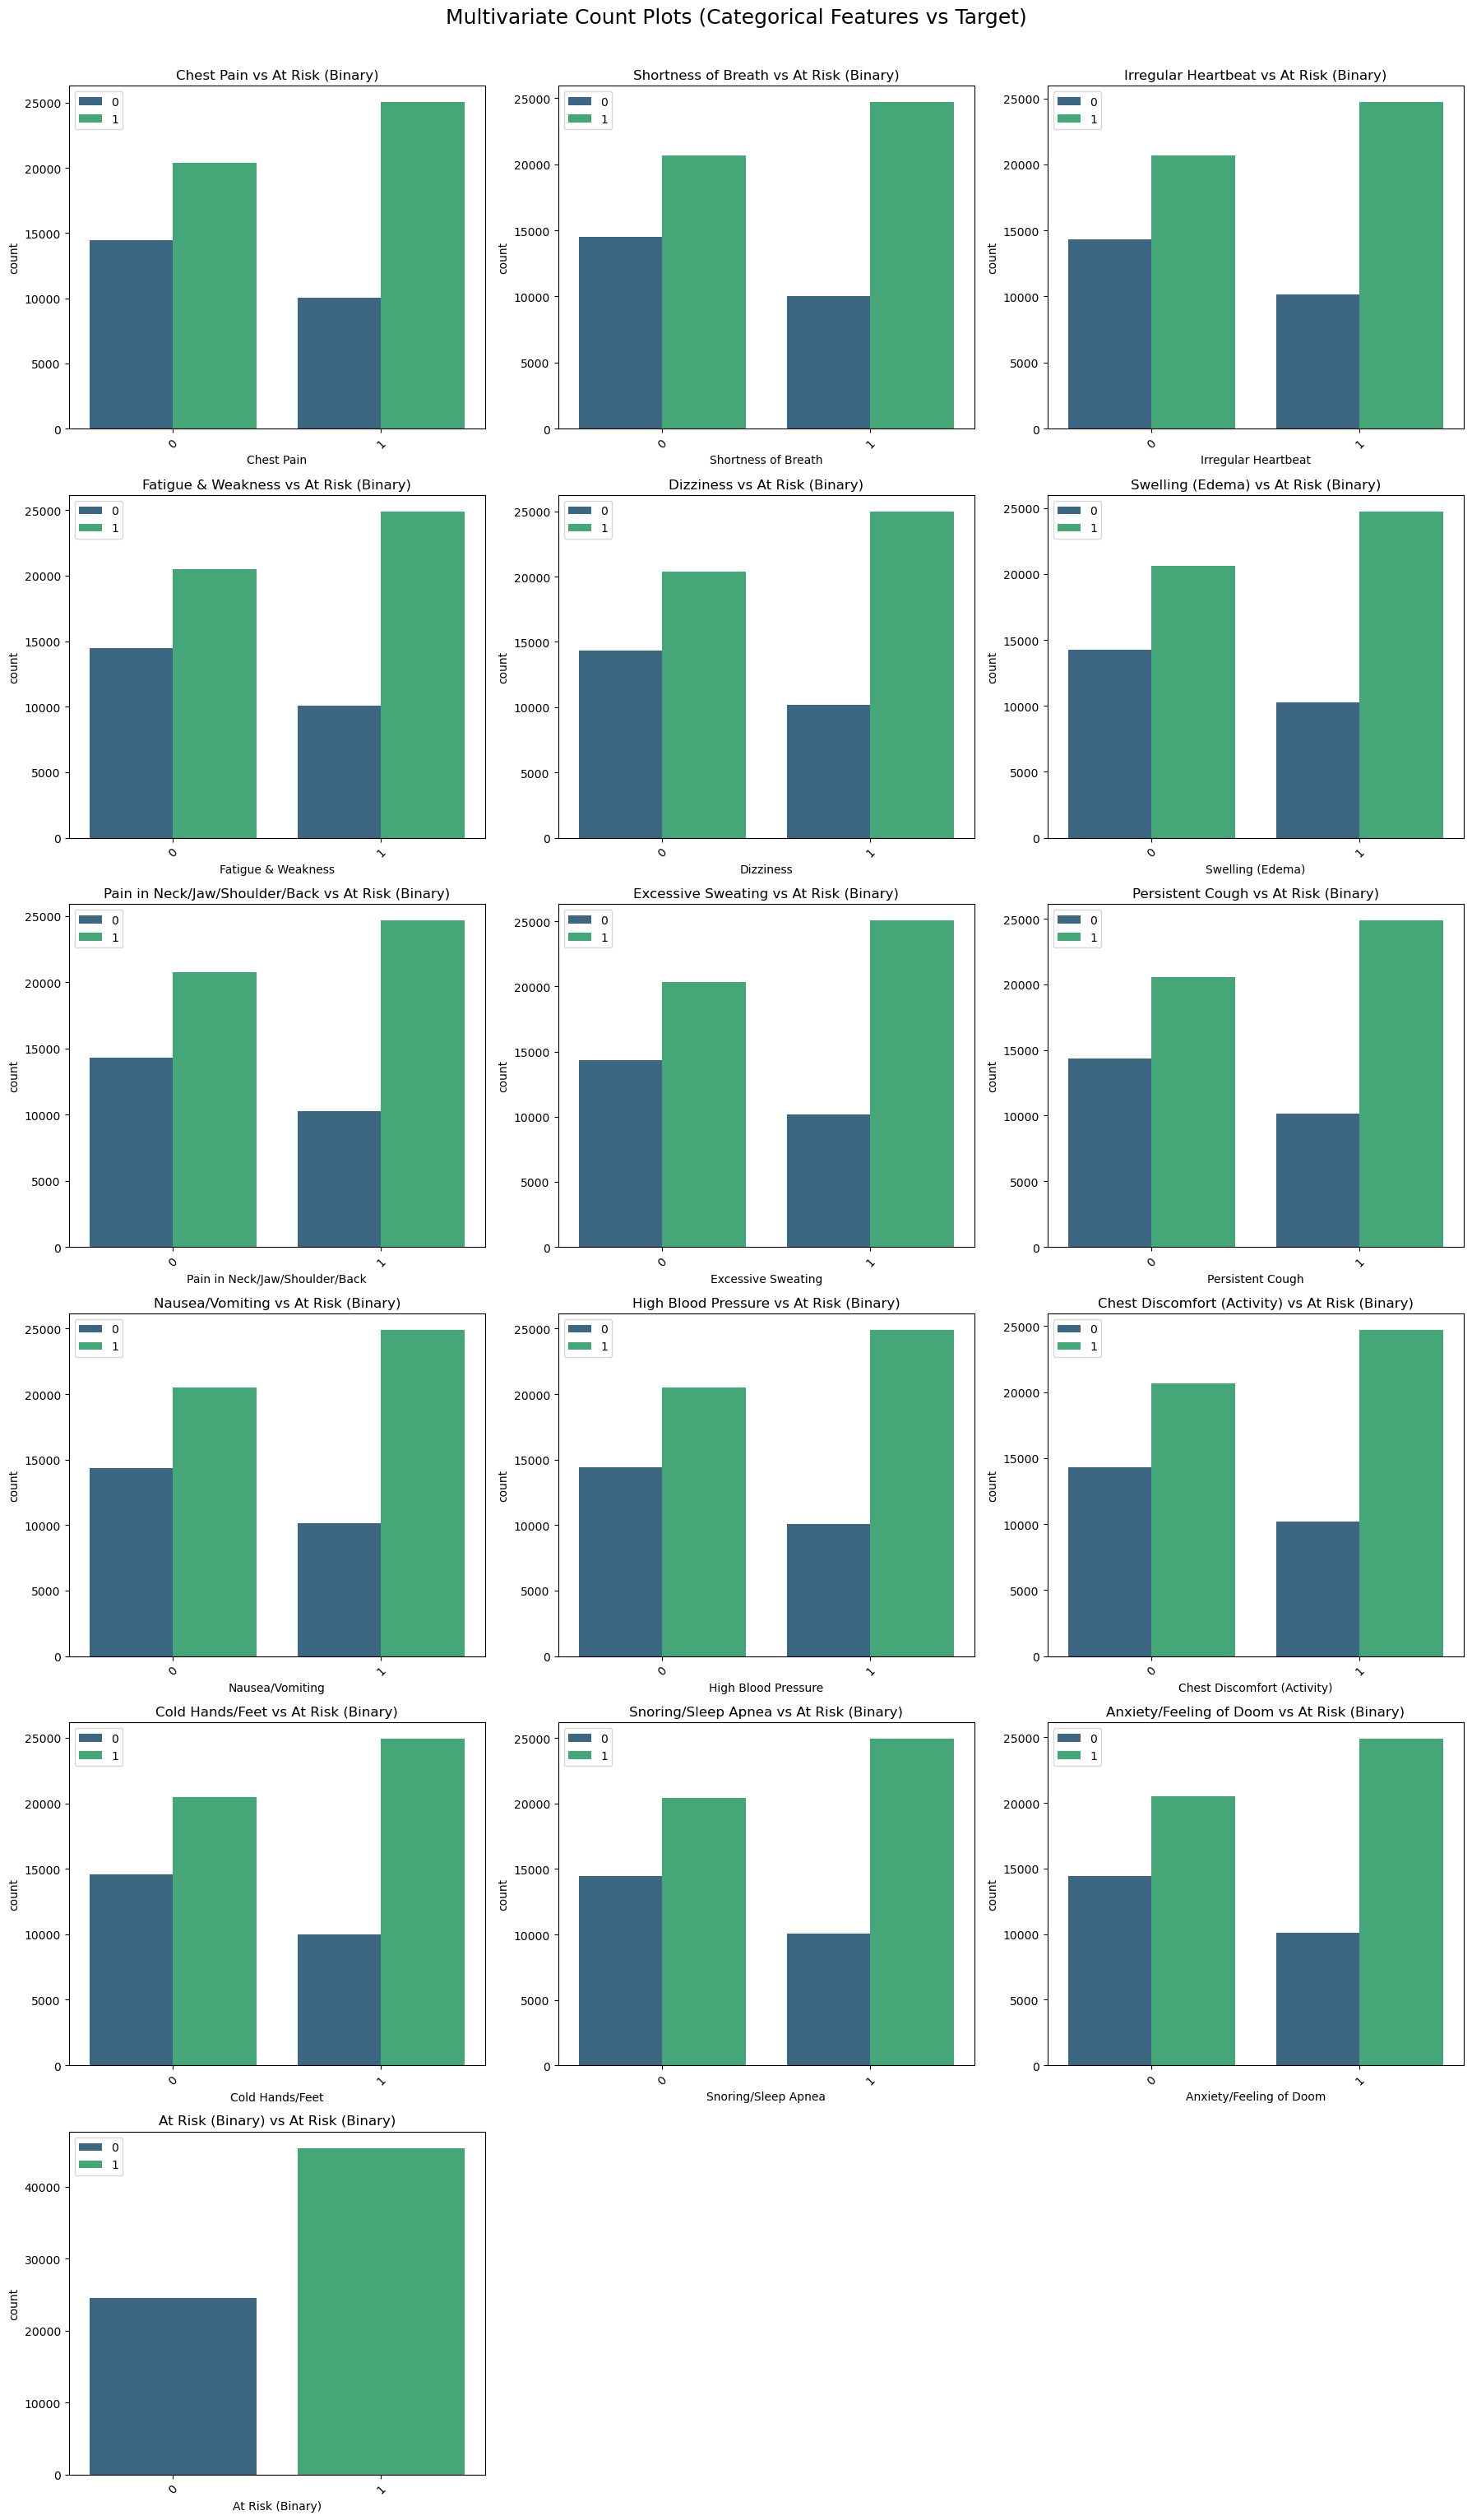

In [111]:
multivariate_xcountplot_all(without_outliers)

People who report having symptoms including chest discomfort, shortness of breath, irregular heartbeat, exhaustion, dizziness, and others are more likely to be labeled as "At Risk" for stroke, according to the multivariate count plots, which indicate a similar pattern across all symptoms.  In each instance, the number of people who are at risk is significantly greater among those who have the symptom than among those who do not.  The predictive usefulness of these variables is highlighted by this trend, which points to a strong positive correlation between the presence of symptoms and the classification of stroke risk.  The importance of these binary symptom characteristics in identifying people who are more at risk is generally supported by the visual data.

In [112]:
def multivariate_xcountplot(column, data):
    sns.countplot(x = column, data = data,  hue= "At Risk (Binary)", palette= "bright");
    plt.xticks(rotation = 45)
    plt.legend(loc= "best")

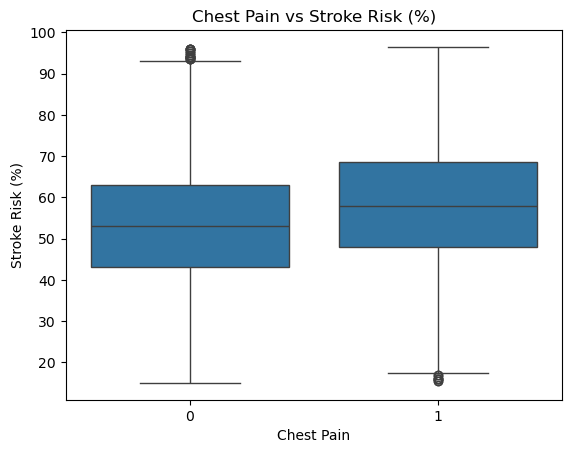

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Chest Pain', y='Stroke Risk (%)', data=without_outliers)
plt.title('Chest Pain vs Stroke Risk (%)')
plt.show()
